In [1]:
!pip install pandas scikit-learn xgboost tensorflow


### **Data Preprocessing**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats

# Load Datasets
train_data = pd.read_csv('synthetic_data_vae.csv')
test_data = pd.read_csv('heart.csv')

# Check for missing values and fill them with the mean of the respective columns
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Handling outliers using Z-score method (keeping values with Z-score < 3)
z_scores = np.abs(stats.zscore(train_data))
train_data = train_data[(z_scores < 3).all(axis=1)]

# Splitting features and target
X_train = train_data.drop(columns=['target'])  # assuming 'target' is the column for labels
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balancing the dataset using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


### **Linear Regression with Regularization (Ridge)**

Ridge Regression Accuracy: 0.8546341463414634
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.88      0.81      0.84       499
         1.0       0.84      0.89      0.87       526

    accuracy                           0.85      1025
   macro avg       0.57      0.57      0.57      1025
weighted avg       0.86      0.85      0.86      1025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


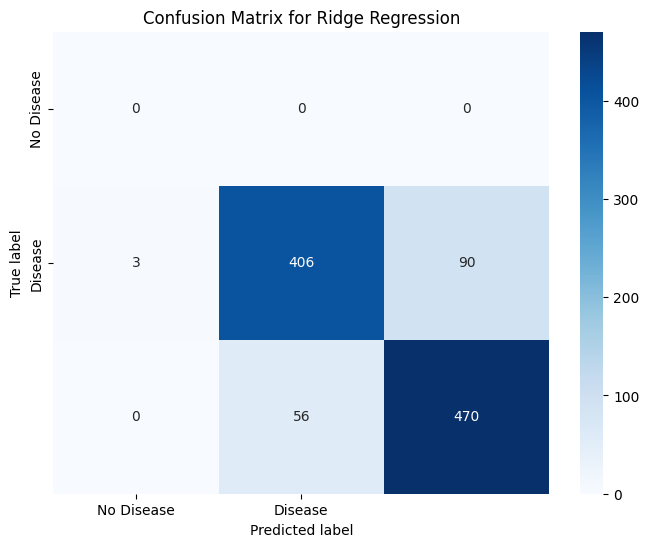

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_ridge = np.round(ridge.predict(X_test))

# Accuracy and report
print("Ridge Regression Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_ridge, "Ridge Regression")


### **Decision Tree with Cross-Validation and Grid Search**

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Accuracy: 0.7960975609756098
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       499
           1       0.84      0.75      0.79       526

    accuracy                           0.80      1025
   macro avg       0.80      0.80      0.80      1025
weighted avg       0.80      0.80      0.80      1025



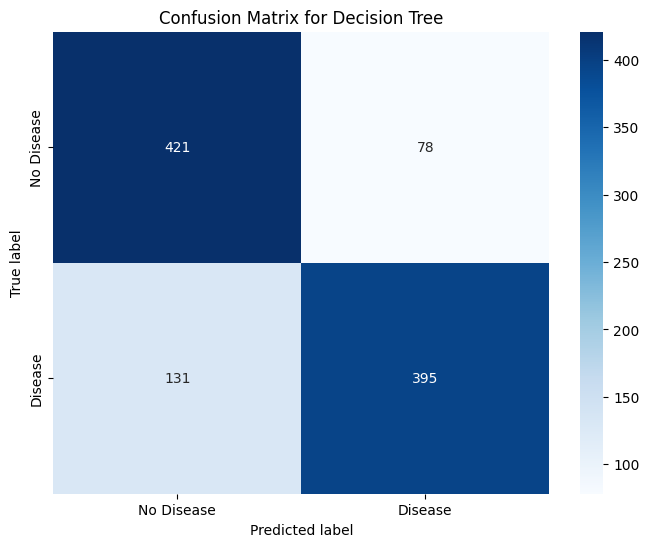

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_dtree.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for Decision Tree:", grid_dtree.best_params_)
y_pred_dt = grid_dtree.predict(X_test)

# Accuracy and report
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

### **K-Nearest Neighbors (KNN) with Hyperparameter Tuning and Cross-Validation**

Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
KNN Accuracy: 0.8585365853658536
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       499
           1       0.86      0.86      0.86       526

    accuracy                           0.86      1025
   macro avg       0.86      0.86      0.86      1025
weighted avg       0.86      0.86      0.86      1025



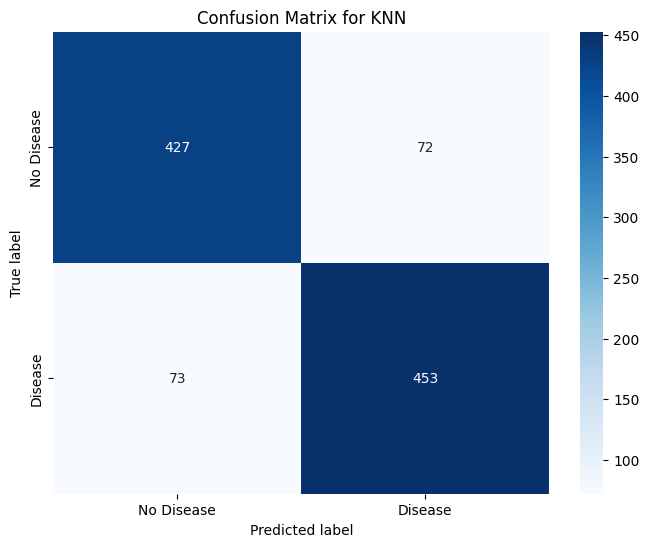

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for KNN:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test)

# Accuracy and report
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


### **Support Vector Machine (SVM) with Grid Search and Cross-Validation**

Best Parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy: 0.8409756097560975
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       499
           1       0.83      0.87      0.85       526

    accuracy                           0.84      1025
   macro avg       0.84      0.84      0.84      1025
weighted avg       0.84      0.84      0.84      1025



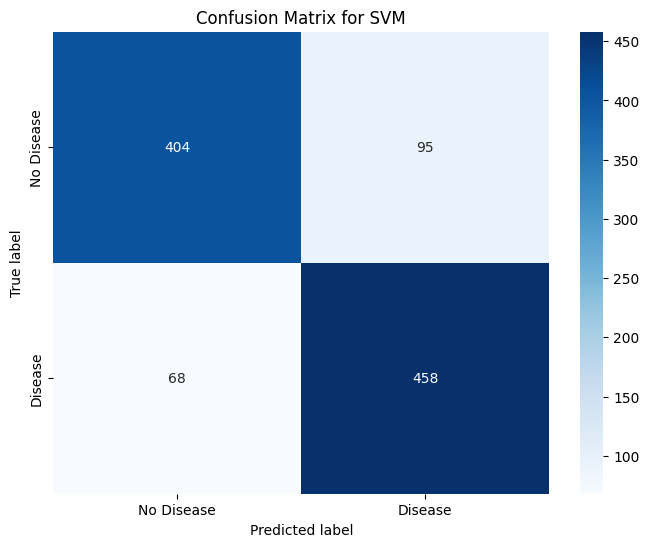

In [7]:
from sklearn.svm import SVC

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_svm.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for SVM:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)

# Accuracy and report
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

### **XGBoost with Hyperparameter Tuning**

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
XGBoost Accuracy: 0.8419512195121951
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       499
           1       0.86      0.83      0.84       526

    accuracy                           0.84      1025
   macro avg       0.84      0.84      0.84      1025
weighted avg       0.84      0.84      0.84      1025



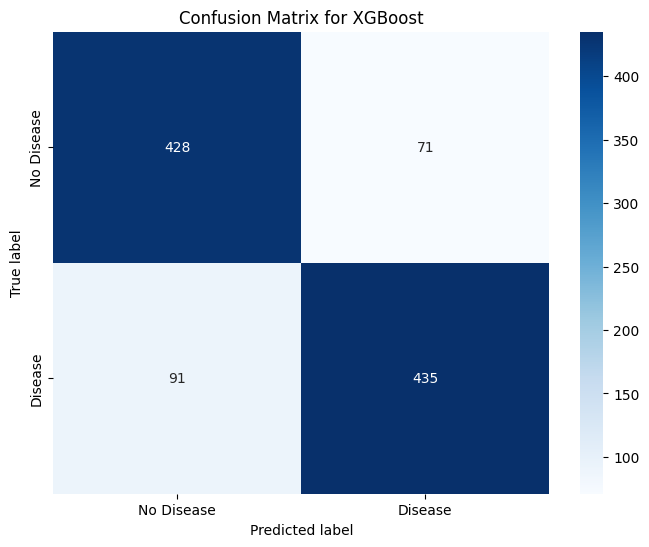

In [8]:
import xgboost as xgb

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid, cv=5)
grid_xgb.fit(X_train_bal, y_train_bal)

# Best parameters and predictions
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test)

# Accuracy and report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

### **Convolutional Neural Network (CNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5683 - loss: 0.6688 - val_accuracy: 0.7102 - val_loss: 0.5864
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7393 - loss: 0.5555 - val_accuracy: 0.7151 - val_loss: 0.5346
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7404 - loss: 0.4986 - val_accuracy: 0.7405 - val_loss: 0.5020
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.4565 - val_accuracy: 0.7268 - val_loss: 0.4965
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7973 - loss: 0.4359 - val_accuracy: 0.7590 - val_loss: 0.4993
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8152 - loss: 0.4175 - val_accuracy: 0.7239 - val_loss: 0.5622
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8009 - loss: 0.3893 - val_accuracy: 0.7512 - val_loss: 0.5112
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8221 - loss: 0.3850 - val_accuracy: 0.7600 - val

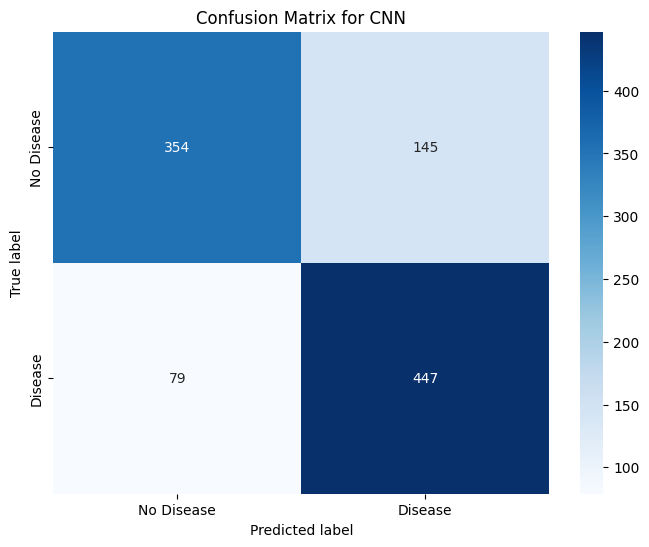

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train_bal, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(128, kernel_size=2, activation='relu'))  # Adding more layers
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))  # Add Dropout to prevent overfitting
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_bal, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate and make predictions
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Accuracy and report
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

### **Ensemble Model**

Voting Classifier Accuracy: 0.8458536585365853
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       499
           1       0.84      0.87      0.85       526

    accuracy                           0.85      1025
   macro avg       0.85      0.85      0.85      1025
weighted avg       0.85      0.85      0.85      1025



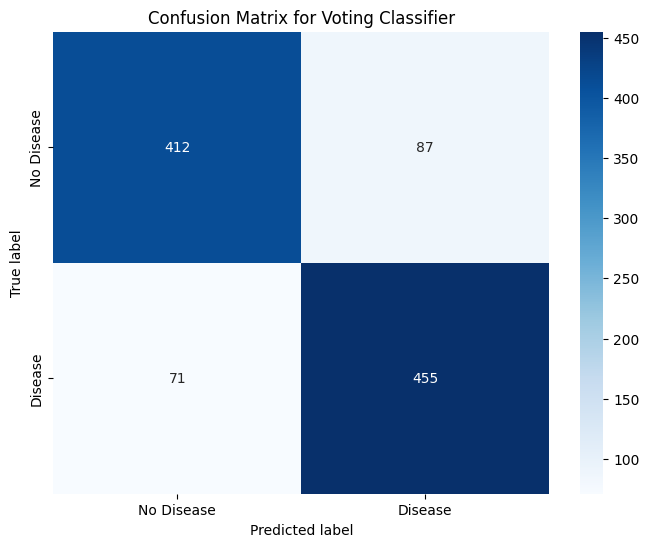

In [10]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier using multiple models
voting_clf = VotingClassifier(estimators=[
    ('dt', grid_dtree.best_estimator_),
    ('svm', grid_svm.best_estimator_),
    ('knn', grid_knn.best_estimator_)
], voting='hard')

voting_clf.fit(X_train_bal, y_train_bal)

# Predictions and evaluation
y_pred_voting = voting_clf.predict(X_test)

# Accuracy and report
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_voting, "Voting Classifier")
